#6.2.1. Рекуррентный слой в Keras

Процессу, который мы только что реализовали с применением Numpy, соответствует фактический слой в Keras — слой SimpleRNN:

In [1]:
from keras.layers import SimpleRNN

Подобно всем рекуррентным слоям в Keras, SimpleRNN может действовать в двух
разных режимах: возвращать полные последовательности результатов для всех
временных интервалов (трехмерный тензор с формой (размер_пакета, временные_интервалы, выходные_признаки)) или только последний результат для каждой входной последовательности (двумерный тензор с формой (размер_пакета,
входные_признаки)). Выбор режима управляется аргументом return_sequences
конструктора. Рассмотрим пример, в котором используется слой SimpleRNN и возвращается результат только для последнего временного интервала:

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Следующий пример возвращает полную последовательность состояний:

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Иногда полезно наложить друг на друга несколько рекуррентных слоев, чтобы
увеличить репрезентативность сети. В таких ситуациях все промежуточные слои
должны возвращать полные последовательности результатов:

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # Последний слой возвращает только последний результат
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Теперь попробуем применить такую же модель для решения задачи классификации
отзывов к фильмам из набора данных IMDB. Сначала подготовим данные.

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
 num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Обучим простую рекуррентную сеть, состоящую из слоев Embedding и SimpleRNN.

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step - acc: 0.5645 - loss: 0.6730 - val_acc: 0.7738 - val_loss: 0.4834
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - acc: 0.8113 - loss: 0.4305 - val_acc: 0.7268 - val_loss: 0.5930
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - acc: 0.8627 - loss: 0.3300 - val_acc: 0.8366 - val_loss: 0.3743
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - acc: 0.8993 - loss: 0.2609 - val_acc: 0.7970 - val_loss: 0.4545
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - acc: 0.9275 - loss: 0.1988 - val_acc: 0.8642 - val_loss: 0.3764
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - acc: 0.9495 - loss: 0.1412 - val_acc: 0.8528 - val_loss: 0.4099
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - acc: 0.9721 - loss: 0.0903 - val_acc: 0.8240 - val_loss: 0.4717
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - acc: 0.9805 - loss: 0.0643 - val_acc: 0.7964 - val_loss: 0.8393
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━

Теперь выведем графики изменения величины потерь и точности модели на этапах
обучения и проверки.

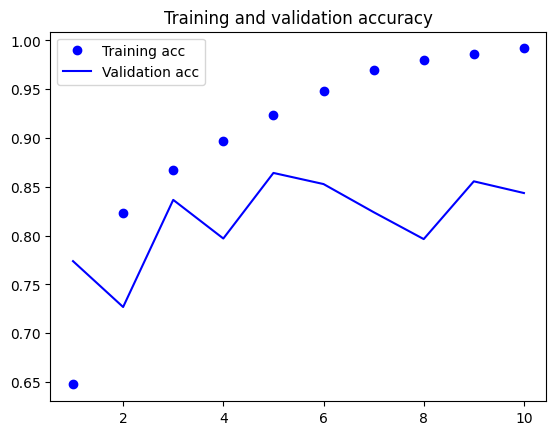

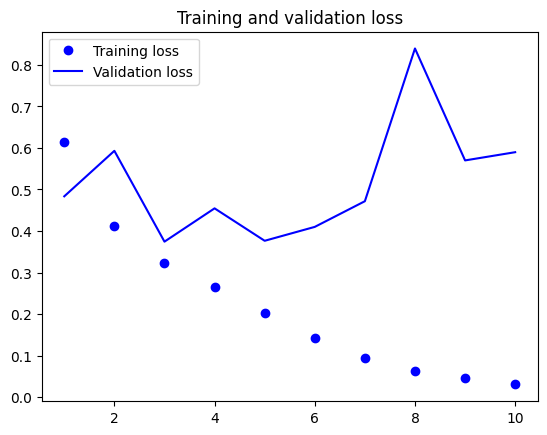

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#6.2.3. Пример использования слоя LSTM из Keras

Создадим модель со слоем LSTM и обучим ее
на данных IMDB (рис. 6.16 и 6.17). Новая сеть похожа на предыдущую, со слоем
SimpleRNN. Мы указали только размерность результата слоя LSTM, оставив другие
аргументы (а их довольно много) со значениями по умолчанию. Значения по умолчанию подобраны в Keras очень хорошо и пригодны для большинства ситуаций, что
избавляет нас от необходимости тратить время на настройку параметров вручную.

In [8]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - acc: 0.5653 - loss: 0.6739 - val_acc: 0.7936 - val_loss: 0.4646
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - acc: 0.8090 - loss: 0.4313 - val_acc: 0.8466 - val_loss: 0.3597
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - acc: 0.8606 - loss: 0.3388 - val_acc: 0.7576 - val_loss: 0.5632
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.8874 - loss: 0.2937 - val_acc: 0.8554 - val_loss: 0.3387
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - acc: 0.8970 - loss: 0.2659 - val_acc: 0.8808 - val_loss: 0.2946
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - acc: 0.9056 - loss: 0.2461 - val_acc: 0.8778 - val_loss: 0.2991
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.9119 - loss: 0.2262 - val_acc: 0.8710 - val_loss: 0.3023
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - acc: 0.9181 - loss: 0.2136 - val_acc: 0.8714 - val_loss: 0.3618
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms

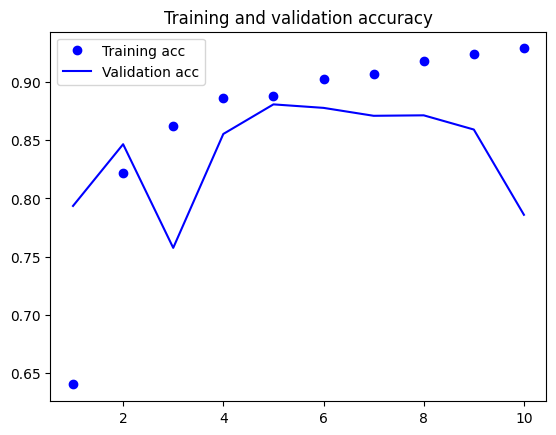

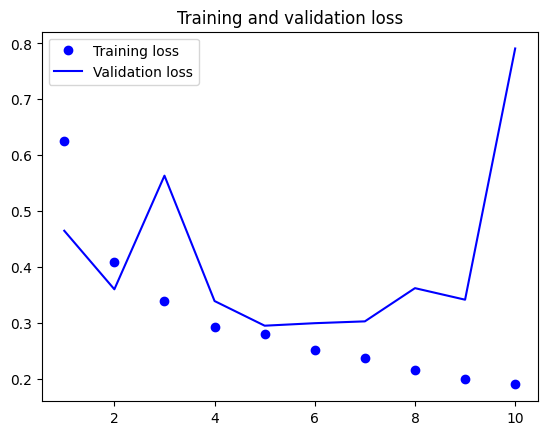

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#6.2.4. Подведение итогов
Теперь мы знаем:

 что такое рекуррентные нейронные сети (RNN) и как они работают;

 что такое LSTM и почему на длинных последовательностях этот подход дает
лучшие результаты, чем простое решение на основе RNN;

 как использовать слои RNN в Keras для обработки последовательных данных.